In [4]:
import matplotlib.pyplot as plt
import random

In [5]:
def single_coin_toss():    
    initial_coin_state = input('Type "Heads" or "Tails" to select the inital coin state: ')
    
    nr_of_flips = int(input('Enter the number of times you want to repeat the coin toss game: '))
        
    #If 0 = coin is not flipped; 1 = coin is flipped    
        
    samples = [random.randint(0, 1) for i in range(nr_of_flips)]
    
    if initial_coin_state == 'Heads':
        heads = samples.count(0)
        tails = samples.count(1)
    elif initial_coin_state == 'Tails': 
        tails = samples.count(0)
        heads = samples.count(1)        

    print("Heads count=%d, Tails count=%d" % (heads, tails))
    
    names = ['Heads', 'Tails']
    
    values = [heads/nr_of_flips, tails/nr_of_flips]
    plt.bar(names, values)
    plt.ylabel('Probability')

Type "Heads" or "Tails" to select the inital coin state:  Heads
Enter the number of times you want to repeat the coin toss game:  10000


Heads count=4930, Tails count=5070


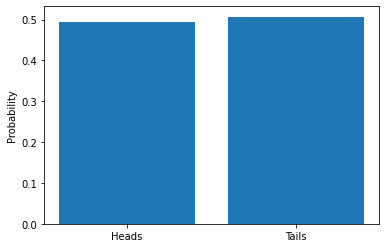

In [6]:
single_coin_toss()

In [7]:
def double_coin_toss():
    initial_coin_state = input('Type "Heads" or "Tails" to select the inital coin state: ')
    
    nr_of_flips = int(input('Enter the number of times you want to repeat the coin toss game: '))
        
    #If 0 = coin is not flipped; 1 = coin is flipped    
        
    coin_results = [0] * nr_of_flips;
    
    for c in range (nr_of_flips):
    
        samples = [random.randint(0, 1) for c in range(2)]
                
        if initial_coin_state == 'Heads':
            if samples[0] == 1 and samples [1] == 1 or samples[0] == 0 and samples [1] == 0:
                coin_results[c] = 0; 
            elif samples[0] == 1 and samples [1] == 0 or samples[0] == 0 and samples [1] == 1:
                coin_results[c] = 1; 
        elif initial_coin_state == 'Tails':
            if samples[0] == 1 and samples [1] == 1 or samples[0] == 0 and samples [1] == 0:
                coin_results[c] = 1; 
            elif samples[0] == 1 and samples [1] == 0 or samples[0] == 0 and samples [1] == 1:
                coin_results[c] = 0;                 
        
    heads = coin_results.count(0);
    tails = coin_results.count(1);
    
    print("Heads count=%d, Tails count=%d" % (heads, tails))
    
    names = ['Heads', 'Tails']
        
    values = [heads/nr_of_flips, tails/nr_of_flips]
    plt.bar(names, values)
    plt.ylabel('Probability')

Type "Heads" or "Tails" to select the inital coin state:  Heads
Enter the number of times you want to repeat the coin toss game:  10000


Heads count=4991, Tails count=5009


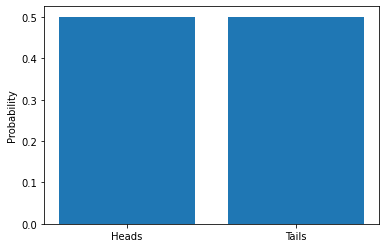

In [8]:
double_coin_toss()

In [9]:
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.tools.monitor import job_monitor

# Import visualization
from qiskit.visualization import plot_histogram, plot_bloch_multivector
import matplotlib.pyplot as plt

#Load account information 
IBMQ.load_account()
provider = IBMQ.get_provider()

In [10]:
def single_quantum_coin_toss(): 
    qc1 = QuantumCircuit(1,1)
    
    initial_coin_state = input('Type "Heads" or "Tails" to select the inital coin state: ')
    
    nr_of_flips = int(input('Enter the number of times you want to repeat the coin toss game: '))
    
    if initial_coin_state == "Heads": 
        qc1.h(0) #A Hadamard gate that creates a superposition
        qc1.measure(0,0)
    elif initial_coin_state == "Tails": 
        qc1.x(0) #Change qubit from Heads to Tails 
        qc1.h(0) #A Hadamard gate that creates a superposition
        qc1.measure(0,0)    

    backend = Aer.get_backend('qasm_simulator')

    job = execute(qc1, backend, shots=nr_of_flips)

    print(job.result().get_counts())

In [11]:
single_quantum_coin_toss()

Type "Heads" or "Tails" to select the inital coin state:  Heads
Enter the number of times you want to repeat the coin toss game:  10000


<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


{'1': 5036, '0': 4964}


Text(0, 0.5, 'Probability')

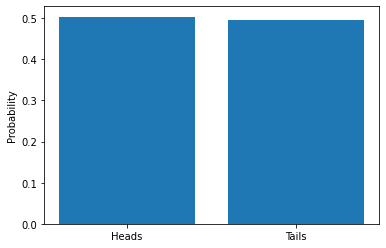

In [12]:
names = ['Heads', 'Tails']
        
values = [5036/10000, 4964/10000] 

plt.bar(names, values)
plt.ylabel('Probability')

In [13]:
def double_quantum_coin_toss(): 
    qc1 = QuantumCircuit(1,1)
    
    initial_coin_state = input('Type "Heads" or "Tails" to select the inital coin state: ')
    
    nr_of_flips = int(input('Enter the number of times you want to repeat the coin toss game: '))
    
    if initial_coin_state == "Heads": 
        qc1.h(0) #A Hadamard gate that creates a superposition
        qc1.h(0) #A Hadamard gate that creates a superposition
        qc1.measure(0,0)
    elif initial_coin_state == "Tails": 
        qc1.x(0) #Change qubit to Tails 
        qc1.h(0) #A Hadamard gate that creates a superposition
        qc1.h(0) #A Hadamard gate that creates a superposition
        qc1.measure(0,0)
              
    backend = Aer.get_backend('qasm_simulator')

    job = execute(qc1, backend, shots=nr_of_flips)
    
    result = job.result().get_counts()
    
    print(job.result().get_counts())

In [14]:
double_quantum_coin_toss()

Type "Heads" or "Tails" to select the inital coin state:  Heads
Enter the number of times you want to repeat the coin toss game:  10000


{'0': 10000}


Text(0, 0.5, 'Probability')

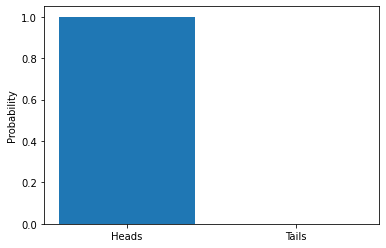

In [15]:
names = ['Heads', 'Tails']
        
values = [10000/10000, 0/10000]

plt.bar(names, values)
plt.ylabel('Probability')